In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.** Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)

In [2]:
iris = datasets.load_iris()
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target

iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
X = iris_frame.drop(columns=['target'])
y = iris_frame.target

In [4]:
U, s, W = np.linalg.svd(X)
D = np.zeros_like(X, dtype=float)
D[np.diag_indices(min(X.shape))] = s
V = W.T

$$X=UDV^{T}$$

In [5]:
np.allclose(X, U @ D @ V.T)

True

In [6]:
D[:4]

array([[95.95991387,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.46093093,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.88482631]])

In [7]:
variance = np.var(X, axis=0, ddof=1).sum()

In [8]:
D[3, 3] = 0
D[:4]

array([[95.95991387,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.46093093,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [9]:
X1 = U @ D @ V.T

variance1 = np.var(X1, axis=0, ddof=1).sum()

print(f'При уменьшении количества коррелированных признаков на 1 доля потерянной информации составляет \
{(1 - variance1 / variance) * 100:.2f}%')

При уменьшении количества коррелированных признаков на 1 доля потерянной информации составляет 0.52%


In [10]:
D[2, 2] = 0
D[:4]

array([[95.95991387,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [11]:
X2 = U @ D @ V.T

variance2 = np.var(X2, axis=0, ddof=1).sum()

print(f'При уменьшении количества коррелированных признаков на 2 доля потерянной информации составляет \
{(1 - variance2 / variance) * 100:.2f}%')

При уменьшении количества коррелированных признаков на 2 доля потерянной информации составляет 2.28%


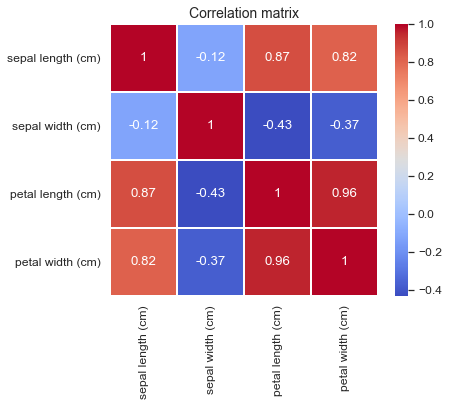

In [12]:
plt.figure(figsize = (6, 5))
sns.set(font_scale=1.1)
sns.heatmap(X.corr().round(2), annot=True, linewidths=1, cmap='coolwarm')

plt.title('Correlation matrix', fontsize=14)
plt.show()

In [13]:
Z = X.dot(V[:, :2])
Z.columns = ['Principal component 1', 'Principal component 2']

Z

,Principal component 1,Principal component 2
0,-5.912747,2.302033
1,-5.572482,1.971826
2,-5.446977,2.095206
3,-5.436459,1.870382
4,-5.875645,2.328290
...,...,...
145,-9.226517,-0.931293
146,-8.566265,-1.039134
147,-9.025923,-0.885027
148,-9.105599,-0.996416


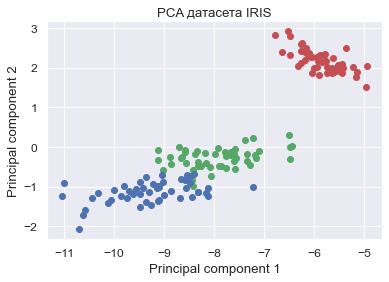

In [14]:
plt.figure()
Z = np.array(Z)
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA датасета IRIS')
plt.show()

**Задание 2.** Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

In [15]:
def fit_model(X, y):
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = GradientBoostingClassifier(random_state=42)

    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    
    return y_pred, y_test, score

In [16]:
y_pred, y_test, score = fit_model(X, y)

score

1.0

In [17]:
np.allclose(y_pred, y_test)

True

Качество классификации на полном датасете равно 100%.

*Сократим размерность датасета до 3:*

In [18]:
Z_3 = X.dot(V[:, :3])
Z_3.columns = ['Principal component 1', 'Principal component 2', 'Principal component 3']

Z_3

,Principal component 1,Principal component 2,Principal component 3
0,-5.912747,2.302033,0.007402
1,-5.572482,1.971826,0.244592
2,-5.446977,2.095206,0.015029
3,-5.436459,1.870382,0.020505
4,-5.875645,2.328290,-0.110338
...,...,...,...
145,-9.226517,-0.931293,-0.204095
146,-8.566265,-1.039134,0.159305
147,-9.025923,-0.885027,-0.143421
148,-9.105599,-0.996416,-0.737103


In [19]:
y_pred, y_test, score = fit_model(Z_3, y)

score

0.9777777777777777

In [20]:
sum(y_pred != y_test)

1

Качество классификации при уменьшении размерности на один признак ухудшилось со 100% до 98%, алгоритм допустил 1 ошибку.

*Сократим размерность датасета до 2:*

In [21]:
Z_2 = X.dot(V[:, :2])
Z_2.columns = ['Principal component 1', 'Principal component 2']

Z_2

,Principal component 1,Principal component 2
0,-5.912747,2.302033
1,-5.572482,1.971826
2,-5.446977,2.095206
3,-5.436459,1.870382
4,-5.875645,2.328290
...,...,...
145,-9.226517,-0.931293
146,-8.566265,-1.039134
147,-9.025923,-0.885027
148,-9.105599,-0.996416


In [22]:
y_pred, y_test, score = fit_model(Z_2, y)

score

0.9777777777777777

In [23]:
sum(y_pred != y_test)

1

Качество классификации при уменьшении размерности вдвое ухудшилось со 100% до 98%, не изменившись по сравнению с размерностью датасета в 3 признака, алгоритм допустил 1 ошибку.

*Сократим размерность датасета до 1:*

In [24]:
Z_1 = X.dot(V[:, :1])
Z_1.columns = ['Principal component 1']

Z_1

,Principal component 1
0,-5.912747
1,-5.572482
2,-5.446977
3,-5.436459
4,-5.875645
...,...
145,-9.226517
146,-8.566265
147,-9.025923
148,-9.105599


In [25]:
y_pred, y_test, score = fit_model(Z_1, y)

score

0.8444444444444444

In [26]:
sum(y_pred != y_test)

7

Качество классификации при уменьшении размерности до 1 признака ухудшилось до 84%, алгоритм допустил 7 ошибок.